In [7]:
%matplotlib inline


===============================================
Create timeline of signficant dockless pilot dates
===============================================


In [19]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
from datetime import datetime

# A list of Matplotlib releases and their dates
# Taken from https://api.github.com/repos/matplotlib/matplotlib/releases
names = ['Lime intros scooters',
        'Pilot: Extended to Aug',
        'Pilot: Original end date',
        'Lime annouces shift to more scooters',
        'Mobike app goes dark',
        'Ofo announces DC exit', 
        'Mobike announces DC exit',
        'Ofo DC exit',
        'Spin announces DC exit \nwill return as all-scooter fleet', 
        'Pilot: Extended again to Dec w/ new rules',
        'CaBi starts E-Assist Pilot']

names.reverse()
dates = ['3/10/2018',
         '4/27/2018',
         '4/30/2018',
         '5/21/2018',
         '7/20/2018',
         '7/24/2018',
         '7/25/2018',
         '7/30/2018',
         '8/17/2018',
         '8/30/2018',
         '9/05/2018']

dates = [datetime.strptime(ii, "%m/%d/%Y") for ii in dates]
dates.reverse()
dates

[datetime.datetime(2018, 9, 5, 0, 0),
 datetime.datetime(2018, 8, 30, 0, 0),
 datetime.datetime(2018, 8, 17, 0, 0),
 datetime.datetime(2018, 7, 30, 0, 0),
 datetime.datetime(2018, 7, 25, 0, 0),
 datetime.datetime(2018, 7, 24, 0, 0),
 datetime.datetime(2018, 7, 20, 0, 0),
 datetime.datetime(2018, 5, 21, 0, 0),
 datetime.datetime(2018, 4, 30, 0, 0),
 datetime.datetime(2018, 4, 27, 0, 0),
 datetime.datetime(2018, 3, 10, 0, 0)]

<module 'matplotlib.pyplot' from '/home/user/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

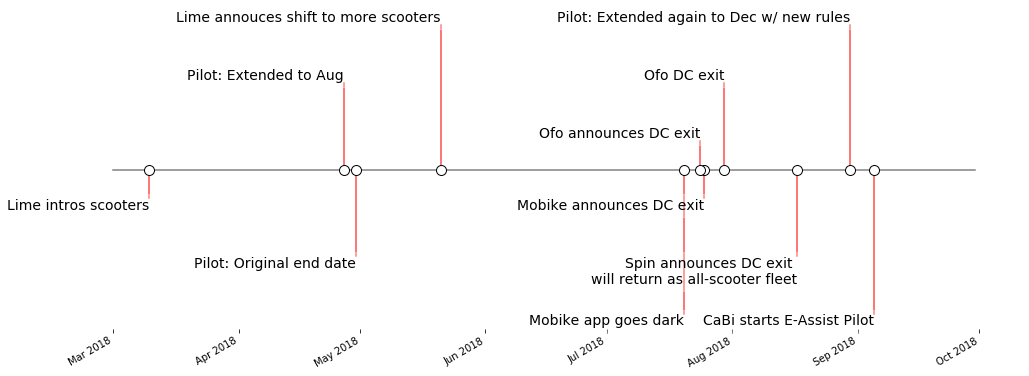

In [20]:
levels = np.array([-5, 5, -3, 3, -1, 1])
fig, ax = plt.subplots(figsize=(17, 6.5))

# Create the base line
start = datetime(2018, 3, 1, 0, 0)
stop = datetime(2018, 9, 30, 0, 0)
ax.plot((start, stop), (0, 0), 'k', alpha=.5)

# Iterate through releases annotating each one
for ii, (iname, idate) in enumerate(zip(names, dates)):
    level = levels[ii % 6]
    vert = 'top' if level < 0 else 'bottom'

    ax.scatter(idate, 0, s=100, facecolor='w', edgecolor='k', zorder=9999)
    # Plot a line up to the text
    ax.plot((idate, idate), (0, level), c='r', alpha=.7)
    # Give the text a faint background and align it properly
    ax.text(idate, level, iname,
            horizontalalignment='right', verticalalignment=vert, fontsize=14,
            backgroundcolor=(1., 1., 1., .3))
#ax.set(title="DoBi Pilot Important Dates since March 2018")
# Set the xticks formatting
# format xaxis with 3 month intervals
ax.get_xaxis().set_major_locator(mdates.MonthLocator(interval=1))
ax.get_xaxis().set_major_formatter(mdates.DateFormatter("%b %Y"))
fig.autofmt_xdate()

# Remove components for a cleaner look
plt.setp((ax.get_yticklabels() + ax.get_yticklines() +
          list(ax.spines.values())), visible=False)

plt.savefig("timeline.jpeg", bbox_inches='tight')

plt